# Simple Thermodynamics

This notebook contains solutions to problems in thermal physics. 

Resources:
    Schroeder (2007). "An introduction to thermal physics", Addison-Wesley-Longman

## Schroeder: 2.1
### Suppose you flip four fair coins:

In [343]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt

#### a) Make a list of all the possible outcomes:

In [344]:
#Create a dictionary to store the up/down values:
sides={0:'H',1:'T'}

In [345]:
#Define a function that "flips coins":
def coinFlip(c,n):
    """Returns the side of a coin as heads(0) or tails(1) for the  
    provided number of flips, n, and coins, c."""
    import numpy.random as npr
    outcomes = []
    for coin in range(c):
        state = []
        for i in range(n):
            flip = int(npr.randint(0,high=2,size=1))
            state.append(flip)
        outcomes.append(state)
    return outcomes

In [346]:
#Define the number of coins and flips from the user:
c = int(input('How many coins? ')) #ask how many coins
n = int(input('How many flips? ')) #ask how many times to flip each coin
omega_All=2**c
print('\n',omega_All,'possible microstates.')

outcomes = coinFlip(n,c) #call the function

How many coins? 20
How many flips? 70000

 1048576 possible microstates.


In [347]:
#create a list to hold the names as 'H' or 'T':
results = []
for i in outcomes:
    state=[]
    for j in i:
        if j == 0:
            state.append(sides[0])
        else:
            state.append(sides[1])
    results.append(state)

In [348]:
#count each macrostate:
microstates={}
ms_lst=[]
hist1=[]
for i in results:
    ms_lst.append(str(i))
    i = tuple(i)
    if i in microstates:
        microstates[i]+=1
    else:
        microstates[i]=1

In [349]:
#print('\nmacrostates & multiplicities:\n',microstates)
col=['coin_{}'.format(num+1) for num in range(c)]
idx=['microstate_{}'.format(num) for num in range(n)]

microDF=pd.DataFrame(results,columns=col,index=idx)
microDF.drop_duplicates(inplace=True)
microDF['occurences']=microstates.values()
microDF.sort_values(by=['coin_{}'.format(num+1) for num in range(c)],\
                        axis=0,inplace=True)
idx=['microstate_{}'.format(num+1) for num in range(len(microDF))]
microDF.index=idx

if len(microDF) < omega_All:
    print('\nOnly',round(len(microDF)/omega_All*100,2),'% of microstates covered. Increase the number of flips.')
else:
    print('\nAll possible microstates realized:')

microDF


Only 6.46 % of microstates covered. Increase the number of flips.


,coin_1,coin_2,coin_3,coin_4,coin_5,coin_6,coin_7,coin_8,coin_9,coin_10,...,coin_12,coin_13,coin_14,coin_15,coin_16,coin_17,coin_18,coin_19,coin_20,occurences
microstate_1,H,H,H,H,H,H,H,H,H,H,...,H,H,H,H,H,H,T,H,T,1
microstate_2,H,H,H,H,H,H,H,H,H,H,...,H,H,H,H,T,H,H,H,H,1
microstate_3,H,H,H,H,H,H,H,H,H,H,...,H,H,H,T,H,H,H,T,H,1
microstate_4,H,H,H,H,H,H,H,H,H,H,...,H,H,H,T,H,H,T,T,H,1
microstate_5,H,H,H,H,H,H,H,H,H,H,...,H,H,H,T,T,H,T,T,H,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
microstate_67695,T,T,T,T,T,T,T,T,T,T,...,T,T,T,H,H,T,T,H,T,1
microstate_67696,T,T,T,T,T,T,T,T,T,T,...,T,T,T,H,T,T,T,H,H,1
microstate_67697,T,T,T,T,T,T,T,T,T,T,...,T,T,T,T,H,H,H,T,H,1
microstate_67698,T,T,T,T,T,T,T,T,T,T,...,T,T,T,T,H,T,H,H,H,1


#### b) Make a list of all the different "macrostates" and their probabilities:

In [350]:
#A macrostate is an expression of the microstates that classifies each microstate. For example,
#the macrostate 'one T' can have 4 different microstates, where the placement of T is different in each.
#Count and then remove double-counting in the macrostates:
for state in results:
    numH=0
    numT=0
    for spin in state:
        if spin == 'H':
            numH+=1
        numT=c-numH
    lstH=['H' for num in range(numH)]
    lstT=['T' for num in range(numT)]
    hist1.append(lstH+lstT)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

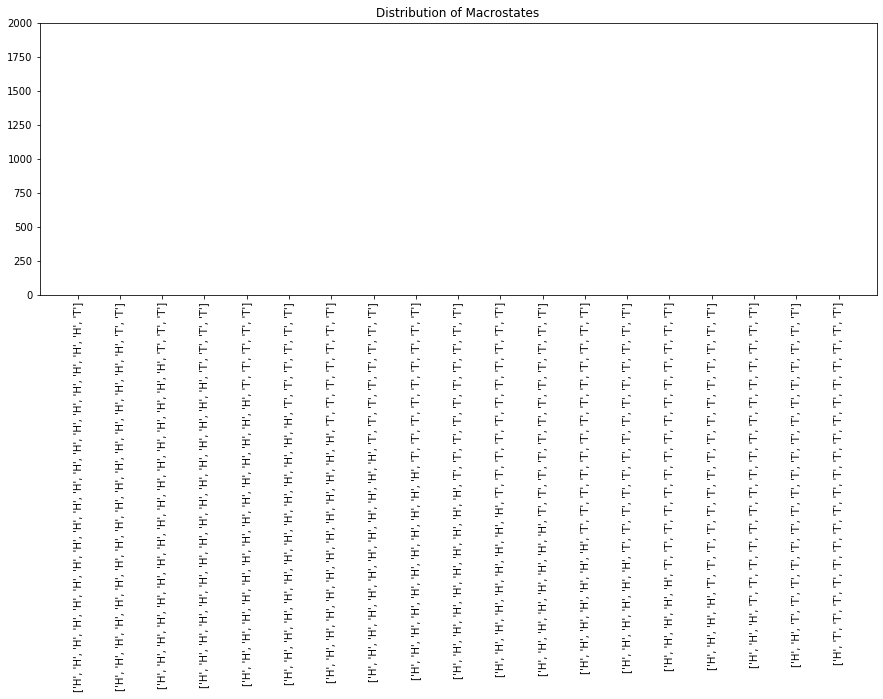

In [357]:
#Plot histogram of the macrostates without double counting:
hist2=sorted([str(i) for i in hist1])

plt.figure(figsize=(15,5))
plt.hist(hist2, bins=round(len(microstates)/2), rwidth=.99)
plt.title('Distribution of Macrostates')
plt.axis(ymin=0,ymax=2000)
plt.xticks(rotation=90)

In [352]:
#Brute force calculation of the probabilities of each macrostate (for 4 coins only):
state0=1/16*100
state1=4/16*100
state2=6/16*100
state3=4/16*100
state4=1/16*100
print('probabilities:\n')
print('0 H:',state0,'%\n1 H:',state1,'%\n2 H:',state2,'%\n3 H:',state3,'%\n4 H:',state4,'%')

probabilities:

0 H: 6.25 %
1 H: 25.0 %
2 H: 37.5 %
3 H: 25.0 %
4 H: 6.25 %


#### c) Compute the multiplicity of each macrostate using the combinatorial formula, and check that these results agree with what you got by brute-force counting.

In [353]:

#Define the multiplicity of each macrostate (N choose n), and the probability of realizing that macrostate:
def multiplicity(c,heads):
    OMEGA = mth.factorial(c)/(mth.factorial(heads)*mth.factorial(c-heads))
    return(OMEGA)

def macroProb(OMEGA):
    prob=OMEGA/omega_All
    return(prob)

In [354]:
#Create a list of the macrostates & their probabilities:
macroProbs=[macroProb(multiplicity(c,h)) for h in range(c+1)]
stateList=np.arange(c+1)
macroList=zip(stateList,macroProbs)

for state,prob in macroList:
    print('# of H=',state,', probability=',prob*100,'%')

# of H= 0 , probability= 9.5367431640625e-05 %
# of H= 1 , probability= 0.0019073486328125 %
# of H= 2 , probability= 0.01811981201171875 %
# of H= 3 , probability= 0.1087188720703125 %
# of H= 4 , probability= 0.4620552062988281 %
# of H= 5 , probability= 1.47857666015625 %
# of H= 6 , probability= 3.696441650390625 %
# of H= 7 , probability= 7.39288330078125 %
# of H= 8 , probability= 12.013435363769531 %
# of H= 9 , probability= 16.017913818359375 %
# of H= 10 , probability= 17.619705200195312 %
# of H= 11 , probability= 16.017913818359375 %
# of H= 12 , probability= 12.013435363769531 %
# of H= 13 , probability= 7.39288330078125 %
# of H= 14 , probability= 3.696441650390625 %
# of H= 15 , probability= 1.47857666015625 %
# of H= 16 , probability= 0.4620552062988281 %
# of H= 17 , probability= 0.1087188720703125 %
# of H= 18 , probability= 0.01811981201171875 %
# of H= 19 , probability= 0.0019073486328125 %
# of H= 20 , probability= 9.5367431640625e-05 %


In [355]:
#Create a dataframe to hold the macrostates and their probabilities:
macroList=zip(stateList,macroProbs)
probDF=pd.DataFrame(macroList)
probDF.columns=['# of H','Probability (%)']
probDF['Probability (%)']=probDF['Probability (%)']*100
probDF=probDF.set_index('# of H')
probDF

,Probability (%)
# of H,
0,0.000095
1,0.001907
2,0.018120
3,0.108719
4,0.462055
5,1.478577
6,3.696442
7,7.392883
8,12.013435
